In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("C:/Users/sebpo/Desktop/fraudTest.csv")

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [16]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [25]:
# Top 4 features 

df3 = df[["gender", "category", "amt", "city_pop", "is_fraud"]]
df3.head()

,gender,category,amt,city_pop,is_fraud
0,M,personal_care,2.86,333497,0
1,F,personal_care,29.84,302,0
2,F,health_fitness,41.28,34496,0
3,M,misc_pos,60.05,54767,0
4,M,travel,3.19,1126,0


In [26]:
# Convert gender and category to dummy variable 

df3 = pd.get_dummies(df3,columns=['gender','category'])
df3.head()

,amt,city_pop,is_fraud,gender_F,gender_M,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [27]:
# Dividing the dateframe into predictors and outcome variable 

X = df3.drop('is_fraud',axis=1)
y = df3['is_fraud']

In [28]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [30]:
from imblearn.over_sampling import RandomOverSampler

# oversampling 
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)


In [32]:
from imblearn.under_sampling import RandomUnderSampler

# undersampling 
rus = RandomOverSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

In [33]:
from imblearn.over_sampling import SMOTE

# undersampling 
sm = SMOTE()
sm_X, sm_y = sm.fit_resample(X_train, y_train)

3.) Train three logistic regression models

In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
model1 = LogisticRegression(solver = 'lbfgs').fit(over_X, over_y)

model2 = LogisticRegression(solver = 'lbfgs').fit(under_X, under_y)

model3 = LogisticRegression(solver = 'lbfgs').fit(sm_X, sm_y)



4.) Test the three models

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)

5.) Which performed best in Out of Sample metrics?

In [44]:
models = [model1, model2, model3]
model_names=['oversampled', 'undersampled', 'smote']
df = pd.DataFrame(columns=["model", "Accuracy", "Precision", "Recall", "RMSE"])

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    model_name=str(name)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
   
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    df = df.append(pd.Series([model_name, accuracy, precision, recall, rmse], index=df.columns), ignore_index=True)

In [45]:
df

,model,Accuracy,Precision,Recall,RMSE
0,oversampled,0.174734,0.004466,0.943425,0.908441
1,undersampled,0.175274,0.004469,0.943425,0.908144
2,smote,0.960886,0.072812,0.764526,0.197774


In [46]:
# Best model is SMOTE because of lowest RMSE, high Accuracy and Precision

6.) Pick two features and plot the two classes before and after SMOTE.

In [47]:
raw_temp = pd.concat([X_train, y_train], axis=1)

In [48]:
raw_temp[raw_temp['is_fraud']==1]['amt']
raw_temp[raw_temp['is_fraud']==1]['city_pop']

172868     2376
330173     1689
213499     1461
401559     7430
441283     5927
          ...  
218091      722
261997    59705
211725     1324
102606     2211
42415       579
Name: city_pop, Length: 1491, dtype: int64

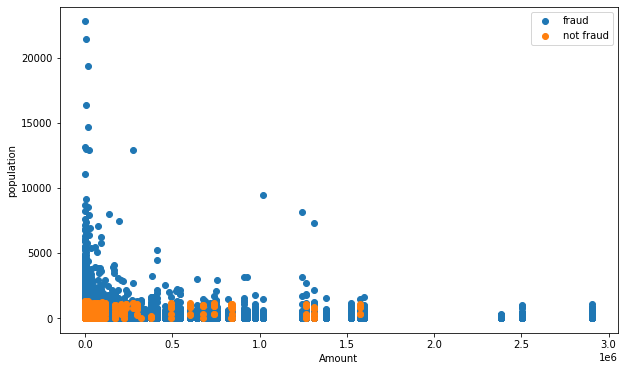

In [51]:
# plot the graph before smote

plt.figure(figsize=(10, 6))
plt.scatter(raw_temp[raw_temp["is_fraud"]==0]["city_pop"], raw_temp[raw_temp["is_fraud"]==0]["amt"])
plt.scatter(raw_temp[raw_temp["is_fraud"]==1]["city_pop"], raw_temp[raw_temp["is_fraud"]==1]["amt"])

plt.legend(["fraud", "not fraud"])
plt.xlabel("Amount")
plt.ylabel("population")
plt.show()

In [53]:
raw_temp1 = pd.concat([sm_X, sm_y], axis=1)

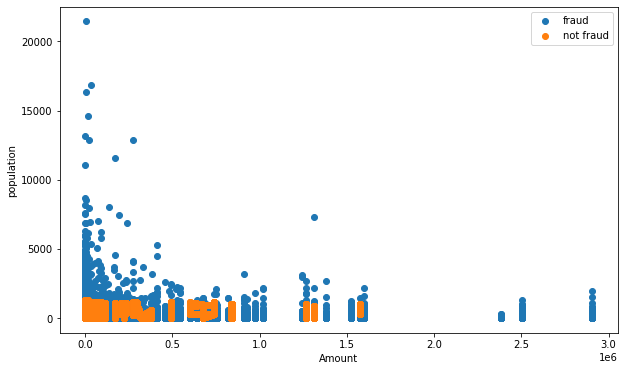

In [54]:
# plot the graph after smote

plt.figure(figsize=(10, 6))
plt.scatter(raw_temp1[raw_temp1["is_fraud"]==0]["city_pop"], raw_temp1[raw_temp1["is_fraud"]==0]["amt"])
plt.scatter(raw_temp1[raw_temp1["is_fraud"]==1]["city_pop"], raw_temp1[raw_temp1["is_fraud"]==1]["amt"])

plt.legend(["fraud", "not fraud"])
plt.xlabel("Amount")
plt.ylabel("population")
plt.show()